In [3]:
import pymupdf
import re
import ftfy
import os 
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document as langDocument


In [4]:

def get_all_file_paths(directory):
    file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Construct absolute file path
            absolute_path = os.path.abspath(os.path.join(root, file))
            file_paths.append(absolute_path)
    return file_paths

def clean_filename_for_embedding(file_path):
    filename = os.path.splitext(os.path.basename(file_path))[0]
    filename = re.sub(r'^\d+[_\s-]*', '', filename)  # Remove leading numbers
    filename = re.sub(r'[_-]\d{6,8}$', '', filename)  # Remove trailing dates
    filename = re.sub(r'[ \-]+', '_', filename)  # Replace spaces/hyphens
    filename = re.sub(r'[^\w_]', '', filename)  # Remove non-word chars
    return filename.lower()

## pdf files

In [122]:

directory_path = r"C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\pdf"
all_files = get_all_file_paths(directory_path)

# Print all absolute paths
for file_path in all_files:
    print(file_path)
    base_filename = os.path.basename(file_path)
    filename_without_ext = os.path.splitext(base_filename)[0]

    # Replace spaces with underscores
    modified_filename = clean_filename_for_embedding(filename_without_ext.replace(' ', '_'))
    print(modified_filename)
    doc = pymupdf.open(file_path)
    cleaned_address ="C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned"
    file_address=cleaned_address+"\\"+modified_filename+".txt"
    print (file_address)
    
    out = open(file_address, "wb") # create a text output
    for page in doc: # iterate the document pages
        text = page.get_text() # get plain text 
        text = ftfy.fix_text(text) # Fix broken encoding from PDFs 
        text = re.sub(r'\s+', ' ', text).strip()# Remove extra line breaks and normalize spaces
        text = re.sub(r'\s*(\d+\.)', r'\n\1', text) # Clean up bullet numbers
        out.write(text.encode("utf8")) # write text of page encoded in utf-8
        #print(text)
        out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
    out.close()

C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\pdf\11A_Basic Meeting Etiquette for Professionals.pdf
a_basic_meeting_etiquette_for_professionals
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\a_basic_meeting_etiquette_for_professionals.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\pdf\18_Verztec_Pantry Rules_060715.pdf
verztec_pantry_rules
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\verztec_pantry_rules.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\pdf\26_Policy on Office Laptop and Computer_050820.pdf
policy_on_office_laptop_and_computer
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\policy_on_office_laptop_and_computer.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\pdf\28_Verztec Digital Meeting Etiquette.pdf
verztec_digital_meeting_etiquette
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\verztec_digital_meeting_etiquette.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\pdf\3_Offboarding Process on Clean Desk Policy_150125.p

# word docs  

In [123]:
from docx import Document
import magic
import win32com.client

In [124]:

def get_file_type(filepath):
    mime = magic.Magic(mime=True)
    file_type = mime.from_file(filepath)
    return file_type

# Example usage
directory_path = r"C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data"
all_files = get_all_file_paths(directory_path)
for file_path in all_files:
    print(get_file_type(file_path))


text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
application/vnd.openxmlformats-officedocument.wordprocessingml.document
application/msword
application/vnd.openxmlformats-officedocument.wordprocessingml.document
application/vnd.openxmlformats-officedocument.wordprocessingml.document
application/pdf
application/pdf
application/pdf
application/pdf
application/pdf
application/pdf
application/pdf


In [125]:

def extract_text_from_doc_using_word(file_path):
    word = win32com.client.Dispatch("Word.Application")
    word.Visible = False
    doc = word.Documents.Open(file_path)
    text = doc.Content.Text
    doc.Close(False)
    word.Quit()
    return text
    
def extract_text_from_docx(file_path):
    doc = Document(file_path)
    return '\n'.join([para.text for para in doc.paragraphs])

def extract_text_from_doc(file_path):
    return textract.process(file_path).decode('utf-8')



In [126]:
directory_path = r"C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\docs"
all_files = get_all_file_paths(directory_path)


In [127]:
import mimetypes
import os
import textract
from docx import Document

def clean_filename_for_embedding(filename):
    filename = filename.replace(' ', '_')
    filename = filename.replace('.', '_')
    filename = filename.strip('_')
    return filename

# Replace spaces with underscores
modified_filename = clean_filename_for_embedding(filename_without_ext.replace(' ', '_'))
print(modified_filename)


# Counters
success_count = 0
fail_count = 0

# File loop
for file_path in all_files:
    mime_type, _ = mimetypes.guess_type(file_path)
    ext = os.path.splitext(file_path)[-1].lower()
    print(file_path)
    base_filename = os.path.basename(file_path)
    print(base_filename)
    filename_without_ext = os.path.splitext(base_filename)[0]
    print(filename_without_ext)

    # Now fully clean the filename
    modified_filename = clean_filename_for_embedding(filename_without_ext)
    print(modified_filename)
    cleaned_address ="C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned"
    file_address=cleaned_address+"\\"+modified_filename+".txt"
    print (file_address)
   
    try:
        if ext == '.docx':
            text = extract_text_from_docx(file_path)
        elif ext == '.doc':
            text = extract_text_from_doc_using_word(file_path)
        else:
            print(f"Skipped non-Word file: {file_path} (type: {mime_type})")
            fail_count += 1
            continue

        print(f"--- Content from {os.path.basename(file_path)} ---")
        
        out = open(file_address, "wb") # create a text output
        
        out.write(text.encode("utf8")) # write text of page encoded in utf-8
        
        out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
        out.close()
        print(text)
        
        print("\n" + "-" * 50 + "\n")
        success_count += 1

    except Exception as e:
        print(f"Failed to extract from {file_path}: {e}")
        fail_count += 1

# Summary
print("\n=== Extraction Summary ===")
print(f"Successful: {success_count}")
print(f"Skipped/Failed: {fail_count}")


8_Basic_Telephone_Skills
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\docs\26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module.docx
26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module.docx
26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module
26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module.txt
--- Content from 26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module.docx ---
Date: 13/07/2020
How to import supplier e-invoice data file from xtranet to ABSS purchase transaction module
As per normal procedure, go to “View Invoice” menu to Print a copy of the invoice with approve the e-invoice thereafter. The hard copy of invoice will be filed to unpaid creditor file after we have checked and confirmed that the e-invoice data has been imported to ABSS purchase transaction module successfully.


A

In [128]:
import os

def clean_filename_for_embedding(filename):
    filename = filename.replace(' ', '_')
    filename = filename.replace('.', '_')
    filename = filename.strip('_')
    return filename

for file_path in all_files:
    print(file_path)
    base_filename = os.path.basename(file_path)
    print(base_filename)
    filename_without_ext = os.path.splitext(base_filename)[0]
    print(filename_without_ext)

    # Now fully clean the filename
    modified_filename = clean_filename_for_embedding(filename_without_ext)
    print(modified_filename)


C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\docs\26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module.docx
26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module.docx
26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module
26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\docs\2_Verztec Webmail and Autoresponder.doc
2_Verztec Webmail and Autoresponder.doc
2_Verztec Webmail and Autoresponder
2_Verztec_Webmail_and_Autoresponder
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\docs\Project Sign off and Change Acknowledgement Form_250227 .docx
Project Sign off and Change Acknowledgement Form_250227 .docx
Project Sign off and Change Acknowledgement Form_250227 
Project_Sign_off_and_Change_Acknowledgement_Form_250227
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\docs\SOP checklist transcription projects_270225.docx
SOP checklist transcription projects_270225.docx
SOP checklist transcrip

# dumb chunking 

In [129]:
#chunk settings, 
splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=10)
all_chunks_dumb = []

In [130]:
cleaned_files = get_all_file_paths(cleaned_address)
for fp in cleaned_files:
    print(fp)

C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\2_Verztec_Webmail_and_Autoresponder.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\a_basic_meeting_etiquette_for_professionals.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\basic_telephone_skills.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\offboarding_process_on_clean_desk_policy.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\policy_on_office_laptop_and_computer.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\Project_Sign_off_and_Change_Acknowledgement_Form_250227.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\SOP_checklist_transcription_projects_270225.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\verztec_digital_meeting_etiquette.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\verztec_ownership_poli

In [131]:
#chunking 

cleaned_files = get_all_file_paths(cleaned_address)

for file_path in cleaned_files:
    print (file_path)
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    #print(text)
    texts = splitter.split_text(text)
    #print(texts)
    chunks = [
        langDocument
        (
            page_content=chunk,
            metadata=
            {
                "source": os.path.splitext(os.path.basename(file_path))[0],
                "doc_type": "pdf",
                "chunk_id": f"{os.path.splitext(os.path.basename(file_path))[0]}_{i}"
            }
        )
          for i, chunk in enumerate(texts)
    ]
    all_chunks_dumb.extend(chunks)


    




C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\2_Verztec_Webmail_and_Autoresponder.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\a_basic_meeting_etiquette_for_professionals.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\basic_telephone_skills.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\offboarding_process_on_clean_desk_policy.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\policy_on_office_laptop_and_computer.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\Project_Sign_off_and_Change_Acknowledgement_Form_250227.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\SOP_checklist_transcription_projects_270225.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\verztec_digital_meeting_etiquette.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\verztec_ownership_poli

# smarter chunking 

In [132]:
splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,  # max length per chunk
    chunk_overlap=25,  # overlap to preserve context
    separators=["\n\n", "\n", ".", "!", "?", ",", " "]  # prioritize paragraph/sentence breaks
)
all_chunks_smarter = []

In [133]:

for file_path in cleaned_files:
    print (file_path)
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    #print(text)
    texts = splitter.split_text(text.lower())
    #print(texts)
    chunks = [
        langDocument
        (
            page_content=chunk,
            metadata=
            {
                "source": os.path.splitext(os.path.basename(file_path))[0],
                "doc_type": "pdf",
                "chunk_id": f"{os.path.splitext(os.path.basename(file_path))[0]}_{i}"
            }
        )
          for i, chunk in enumerate(texts)
    ]
    all_chunks_smarter.extend(chunks)

C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\2_Verztec_Webmail_and_Autoresponder.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\a_basic_meeting_etiquette_for_professionals.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\basic_telephone_skills.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\offboarding_process_on_clean_desk_policy.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\policy_on_office_laptop_and_computer.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\Project_Sign_off_and_Change_Acknowledgement_Form_250227.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\SOP_checklist_transcription_projects_270225.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\verztec_digital_meeting_etiquette.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\verztec_ownership_poli

# smarter smarter chunking........

In [134]:
fallback_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50,
    separators=["\n\n", "\n", ".", "!", "?"]
)
all_chunks_smarter2=[]


In [135]:
header_pattern = r"(?m)^(?=\S)[A-Z][A-Z\s&@\-']{5,}$"

# Match common bullet styles
bullet_pattern = r'(?m)^(?:\d+[\.\)]|[a-zA-Z][\.\)]|[-•*])\s+'

In [136]:
def split_by_headers_and_bullets(text):
    chunks = []
    headers = list(re.finditer(header_pattern, text))
    
    if not headers:
        return split_by_bullets(text)  # no headers found, go straight to bullets
    
    for i in range(len(headers)):
        start = headers[i].start()
        end = headers[i+1].start() if i + 1 < len(headers) else len(text)
        
        section = text[start:end].strip()
        section_chunks = split_by_bullets(section)
        chunks.extend(section_chunks)
    
    return chunks

def split_by_bullets(text):
    # Combine bullet marker + its content into one match using lookahead
    pattern = r'(?m)(?:^\s*(\d+[\.\)]|[a-zA-Z][\.\)]|[-•*])\s+)(.*?)(?=^\s*(\d+[\.\)]|[a-zA-Z][\.\)]|[-•*])\s+|$)'

    matches = list(re.finditer(pattern, text, flags=re.DOTALL | re.MULTILINE))
    chunks = []

    for match in matches:
        full_chunk = match.group(0).strip()

        # Skip invalid or trivial chunks
        if len(full_chunk) < 5 or full_chunk.strip().isdigit():
            continue

        # Long bullet content gets sub-chunked
        if len(full_chunk) > 600:
            chunks.extend(fallback_splitter.split_text(full_chunk))
        else:
            chunks.append(full_chunk)

    return chunks


In [137]:


for file_path in cleaned_files:
    print(file_path)
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    smart_chunks = split_by_bullets(text.lower())

    docs = [
        langDocument(
            page_content=chunk,
            metadata={
                "source": os.path.splitext(os.path.basename(file_path))[0],
                "doc_type": "text",
                "chunk_id": f"{os.path.splitext(os.path.basename(file_path))[0]}_{i}"
            }
        )
        for i, chunk in enumerate(smart_chunks)
    ]
    all_chunks_smarter2.extend(docs)


C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\2_Verztec_Webmail_and_Autoresponder.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\a_basic_meeting_etiquette_for_professionals.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\basic_telephone_skills.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\offboarding_process_on_clean_desk_policy.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\policy_on_office_laptop_and_computer.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\Project_Sign_off_and_Change_Acknowledgement_Form_250227.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\SOP_checklist_transcription_projects_270225.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\verztec_digital_meeting_etiquette.txt
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\verztec_ownership_poli

# convert from chunks to vector representations 

In [138]:
from sentence_transformers import SentenceTransformer
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document
from langchain.embeddings import OpenAIEmbeddings

# Load the HuggingFace model through LangChain wrapper
embedding_model1 = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2",
     encode_kwargs={'normalize_embeddings': True}
)
embedding_model2 = HuggingFaceEmbeddings(
    model_name="BAAI/bge-small-en-v1.5",
    encode_kwargs={'normalize_embeddings': True}  # Very important for bge!
)

# all_chunks should be a list of langchain.schema.Document objects
# Each Document needs at least `page_content`, optionally `metadata`

vector_db_dumb = FAISS.from_documents(all_chunks_dumb, embedding_model1)

vector_db_smart = FAISS.from_documents(all_chunks_smarter, embedding_model1)

vector_db_smart2_model1 = FAISS.from_documents(all_chunks_smarter2, embedding_model1)

vector_db_smart2_model2 = FAISS.from_documents(all_chunks_smarter2, embedding_model2)

# Save the FAISS index locally
vector_db_dumb.save_local("faiss_index1")
vector_db_smart.save_local("faiss_index2")
vector_db_smart2_model1.save_local("faiss_index3")
vector_db_smart2_model2.save_local("faiss_index4")



In [139]:
# Reuse the same embedding model when loading
embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

#vector_db = FAISS.load_local("faiss_index", embedding_model,allow_dangerous_deserialization =True )


📚 Offboarding and Clean Desk Policy
"What should I do with personal files on my laptop before leaving the company?"

"Steps for returning company property during offboarding"

"How to clean my desk before last day at work?"

"Digital file backup and handover requirements"

🏢 Ownership and Responsibility (Work Ownership Policy)
"What happens if I approve a client task without management approval?"

"Policy about re-confirming project details with clients"

"Consequences of misunderstanding client project requirements"

☎️ Telephone Skills
"Proper way to answer a business phone call at Verztec"

"How to deal with a difficult caller on the phone?"

"Best practices for closing a phone call professionally"

👥 Meeting Etiquette (Physical Meetings)
"Where should I sit when waiting for a client in a meeting room?"

"Proper way to exchange name cards during meetings"

"What should I do if my laptop needs AV setup for a presentation?"

🥪 Pantry Rules
"Rules for using the office pantry"

"What should I do after eating at the pantry?"

"Can I cut fruits directly on the kitchen counter?"

💻 Office Laptop and Computer Guidelines
"Laptop care instructions for office use"

"What to do with your laptop charger after work?"

"Steps to take if working from home on a shared office computer"

💬 Digital Meeting Etiquette
"Video requirements for internal digital meetings"

"Expected behavior during virtual meetings"

"What to do if you want to speak during a digital meeting?"

In [140]:
query = "Best practices for closing a phone call professionally"

In [141]:
results = vector_db_dumb.similarity_search_with_score(query, k=5)

for doc, score in results:
    print("-----")
    print(doc.page_content)
    print(doc.metadata)
    print(f"Score: {score}")

-----
calls should be professionally handled. Once you are using the telephone you need to develop some
{'source': 'basic_telephone_skills', 'doc_type': 'pdf', 'chunk_id': 'basic_telephone_skills_4'}
Score: 0.6212896704673767
-----
rules of politeness. Be helpful to the caller even if the subject of the call is not strictly
{'source': 'basic_telephone_skills', 'doc_type': 'pdf', 'chunk_id': 'basic_telephone_skills_56'}
Score: 0.8554773330688477
-----
call for no reasons, especially when it is business related. Your caller will have some objective
{'source': 'basic_telephone_skills', 'doc_type': 'pdf', 'chunk_id': 'basic_telephone_skills_20'}
Score: 0.8791711330413818
-----
help now, or someone who can ring them back later. Don't put the caller on hold and then leave them
{'source': 'basic_telephone_skills', 'doc_type': 'pdf', 'chunk_id': 'basic_telephone_skills_58'}
Score: 0.9111974239349365
-----
address, telephone number etc. Dealing with difficult callers Sometimes a caller is very 

In [142]:
results = vector_db_smart.similarity_search_with_score(query, k=5)

for doc, score in results:
    print("-----")
    print(doc.page_content)
    print(doc.metadata)
    print(f"Score: {score}")

-----
. inward calls should be professionally handled
{'source': 'basic_telephone_skills', 'doc_type': 'pdf', 'chunk_id': 'basic_telephone_skills_6'}
Score: 0.8571982383728027
-----
. telephone etiquette just because you can't see the caller
{'source': 'basic_telephone_skills', 'doc_type': 'pdf', 'chunk_id': 'basic_telephone_skills_74'}
Score: 0.8992626667022705
-----
calls help build a good rapport and avoid misunderstandings and wasting time
{'source': 'basic_telephone_skills', 'doc_type': 'pdf', 'chunk_id': 'basic_telephone_skills_15'}
Score: 0.9354790449142456
-----
, contact details and also note down the query when you close the call you should: • make sure that
{'source': 'basic_telephone_skills', 'doc_type': 'pdf', 'chunk_id': 'basic_telephone_skills_23'}
Score: 0.9507884383201599
-----
. for all calls you should make a note of who rang, for what reason
{'source': 'basic_telephone_skills', 'doc_type': 'pdf', 'chunk_id': 'basic_telephone_skills_61'}
Score: 0.9515857696533203


In [143]:
results = vector_db_smart2_model1.similarity_search_with_score(query, k=5)

for doc, score in results:
    print("-----")
    print(doc.page_content)
    print(doc.metadata)
    print(f"Score: {score}")

-----
2. handling unclear or inaudible parts
{'source': 'SOP_checklist_transcription_projects_270225', 'doc_type': 'text', 'chunk_id': 'SOP_checklist_transcription_projects_270225_1'}
Score: 1.4341137409210205
-----
3. dispose your left over food, boxes/ plastic containers outside the office. when using the office's bin, please close the lid properly after disposal.
{'source': 'verztec_pantry_rules', 'doc_type': 'text', 'chunk_id': 'verztec_pantry_rules_2'}
Score: 1.4442185163497925
-----
4. please do not pass your name card over the meeting table or wait for the client/prospect to walk up to your seats to greet you. instead, always be pro-active and please walk up to the clients to shake their hand and pass your name card with both hands.
{'source': 'a_basic_meeting_etiquette_for_professionals', 'doc_type': 'text', 'chunk_id': 'a_basic_meeting_etiquette_for_professionals_3'}
Score: 1.4928114414215088
-----
1. respect the speakers -please give your full attention in meeting session
{'s

In [163]:

query="What to do if you want to speak during a digital meeting?"
query="If you have a question, concern or wish to speak, please mention in the private msg to the host"
results = vector_db_smart2_model2.similarity_search_with_score(query, k=5)

for doc, score in results:
    print("-----")
    print(doc.page_content)
    print(doc.metadata)
    print(f"Score: {score}")
print("------------------------------------------------ unchunked?----------------------------------------")
vector_store = FAISS.load_local(
    "verztec_vector_store",
    embedding_model,
    allow_dangerous_deserialization=True
)

results = vector_store.similarity_search_with_score(query, k=5)

for doc, score in results:
    print("-----")
    print(doc.page_content)
    print(doc.metadata)
    print(f"Score: {score}")


-----
4. if you have a question, concern or wish to speak, please mention in the private msg to the host
{'source': 'verztec_digital_meeting_etiquette', 'doc_type': 'text', 'chunk_id': 'verztec_digital_meeting_etiquette_3'}
Score: 0.07834046334028244
-----
1. respect the speakers -please give your full attention in meeting session
{'source': 'verztec_digital_meeting_etiquette', 'doc_type': 'text', 'chunk_id': 'verztec_digital_meeting_etiquette_0'}
Score: 0.6193350553512573
-----
6. it will be good to inform the client earlier in the email that our corporate presentation will need the projector/screen/sound etc. and iftheir meeting has the projector, and if they can standby their it guy to assist with the set up if necessary.
{'source': 'a_basic_meeting_etiquette_for_professionals', 'doc_type': 'text', 'chunk_id': 'a_basic_meeting_etiquette_for_professionals_5'}
Score: 0.7158341407775879
-----
2. turn video on, so we know you are present & in the meeting. check your video sound/image/g

In [157]:
def load_cleaned_texts(folder_path):
    texts, metadatas = [], []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as f:
                raw_text = f.read()
            splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
            chunks = splitter.split_text(raw_text)
            texts.extend(chunks)
            metadatas.extend([{"source": filename}] * len(chunks))
    return texts, metadatas

In [168]:
from langchain_community.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
import os

# ✅ Set OpenRouter API details

os.environ["OPENAI_API_BASE"] = "https://openrouter.ai/api/v1"
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
texts, metadatas = load_cleaned_texts(r"C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned")

vector_store = FAISS.from_texts(texts=texts, embedding=embedding_model, metadatas=metadatas)
vector_store.save_local("verztec_vector_store")

#Load embedding model 
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

# Load FAISS vector store
vector_store = FAISS.load_local(
    #"verztec_vector_store",
    "faiss_index4",
    embedding_model2,
    allow_dangerous_deserialization=True
)

# Create retriever
retriever = vector_store.as_retriever(search_type="similarity", k=1)

# Load OpenRouter DeepSeek model into LangChain
llm = ChatOpenAI(
    model_name="tngtech/deepseek-r1t-chimera:free",
    temperature=0,
    openai_api_key=os.environ["OPENAI_API_KEY"],
    openai_api_base=os.environ["OPENAI_API_BASE"]
)

#  Build RetrievalQA chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    return_source_documents=True
)

query = "what does it mean"
response = qa_chain.invoke({"query": query})

print("query: ",query)
print("Answer:", response["result"])
print("\nSources:")
for doc in response["source_documents"]:
    print("-", doc.metadata["source"])

c:\ProgramData\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


query:  what does it mean
Answer: The provided context outlines key procedures and liabilities in a workflow, likely within a translation or creative services setting. Here's a breakdown of the relevant sections:

### 1. **Handling Unclear or Inaudible Parts (Point 2)**  
   - This refers to protocols for addressing ambiguous or poorly audible content (e.g., in audio/video files or unclear client instructions). Proper documentation or follow-up with the client may be required to resolve such issues.

### 2. **Final Review & Client Clarifications (Point 5)**  
   - Before finalizing a project, the client reviews the deliverables and may request adjustments or clarifications. This ensures the output meets their expectations.

### 3. **Communication Protocol (Point 4)**  
   - Clients or team members are instructed to use private messages to the host for questions or concerns, ensuring organized and traceable communication.

### 4. **Liability Clauses**  
   - **Samples**: If verztec prov

Answer: To close a phone call professionally, especially within the context of the provided guidelines, follow these best practices:

1. **Summarize Key Points**: Recap the main discussion points to ensure alignment and avoid misunderstandings. For example: *"Just to confirm, we’ve agreed on X, Y, and Z."* This aligns with the emphasis on re-confirming critical details.

2. **Clarify Next Steps**: Clearly outline action items, deadlines, and responsibilities. If unsure about any client or internal requirements, express your intent to reconfirm (e.g., *"I’ll double-check with the team and revert by EOD"*), adhering to the culture of reducing miscommunication.

3. **Seek Final Approval or Confirmation**: If there are unresolved doubts, politely mention the need for internal approval (e.g., *"I’ll finalize this after consulting with management and update you shortly"*), reflecting the principle of handling tasks with care.

4. **Express Gratitude**: Thank the caller for their time and input, demonstrating respect and professionalism (e.g., *"Thank you for your clarity on this—it’s been a productive discussion"*).

5. **End Politely**: Close with a courteous farewell (e.g., *"Looking forward to our next steps. Have a great day!"*).

By integrating these steps, you ensure the call concludes respectfully, clearly, and in line with the company’s values of attention to detail and client-centric communication.

Sources:
- verztec_digital_meeting_etiquette
- verztec_ownership_policy
- SOP_checklist_transcription_projects_270225
- verztec_ownership_policy

In [ ]:
test_queries = [
    "What is the company's maternity leave policy?",
    "How to file an insurance claim for workplace injury?",
    "What is the procedure for client refunds?",
    "Salary deduction policies for misconduct?",
    "Employee promotion criteria at Verztec?",
    "How to escalate technical issues in the IT department?",
    "What is the fire evacuation procedure?",
    "Company's stand on remote working full-time?",
    "What is Verztec's social media posting policy?",
    "How to handle client complaints legally?",
    "Company bonus payout policy"
]
positive_test_queries = [
    "What should I do with personal files before leaving the company?",
    "Steps for returning company property during offboarding",
    "Policy about re-confirming project details with clients",
    "Proper way to answer a business phone call at Verztec",
    "How to deal with a difficult caller on the phone?",
    "Where should I sit while waiting for a client during a meeting?",
    "Correct way to hand over a name card to a client",
    "Rules for using the office pantry",
    "What should I do after eating at the pantry?",
    "Laptop care instructions for office use",
    "What to do with your laptop charger after work?",
    "Video requirements for internal digital meetings",
    "Expected behavior during virtual meetings",
    "How to backup work files before offboarding",
    "How to hand over login credentials during offboarding"
]



In [ ]:
scores = []

for query in test_queries:
    results = vector_db_smart2_model2.similarity_search_with_score(query, k=3)
    
    # Extract scores from the top 3 results
    query_scores = [score for doc, score in results]
    
    # Calculate average score for this query
    avg_query_score = sum(query_scores) / len(query_scores)
    
    scores.append(avg_query_score)

# Calculate overall average score across all queries
overall_avg_score = sum(scores) / len(scores)
max_score = max(scores)
min_score = min(scores)

print(f"Overall Average Score for irrelevant queries: {overall_avg_score:.4f}")
print(f"Highest Average Score for an irrelevant query: {max_score:.4f}")
print(f"Lowest Average Score for an irrelevant query: {min_score:.4f}")


Overall Average Score for irrelevant queries: 0.7442
Highest Average Score for an irrelevant query: 0.9453
Lowest Average Score for an irrelevant query: 0.5974


In [ ]:
scores = []

for query in positive_test_queries:
    results = vector_db_smart2_model2.similarity_search_with_score(query, k=3)
    
    # Extract scores from the top 3 results
    query_scores = [score for doc, score in results]
    
    # Calculate average score for this query
    avg_query_score = sum(query_scores) / len(query_scores)
    
    scores.append(avg_query_score)

# Calculate overall average score across all queries
overall_avg_score = sum(scores) / len(scores)
max_score = max(scores)
min_score = min(scores)

print(f"Overall Average Score for irrelevant queries: {overall_avg_score:.4f}")
print(f"Highest Average Score for an irrelevant query: {max_score:.4f}")
print(f"Lowest Average Score for an irrelevant query: {min_score:.4f}")



Overall Average Score for irrelevant queries: 0.6319
Highest Average Score for an irrelevant query: 0.8443
Lowest Average Score for an irrelevant query: 0.4947


# image and text embedding

# document classification 

In [ ]:
directory_path = r"C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\docs"
directory_path1 = r"C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned"
all_files = get_all_file_paths(directory_path)


In [ ]:

directory_path = r"C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\pdf"
all_files = get_all_file_paths(directory_path)

# Print all absolute paths
for file_path in all_files:
    print(file_path)
    base_filename = os.path.basename(file_path)
    filename_without_ext = os.path.splitext(base_filename)[0]

    # Replace spaces with underscores
    modified_filename = clean_filename_for_embedding(filename_without_ext.replace(' ', '_'))
    print(modified_filename)
    doc = pymupdf.open(file_path)
    cleaned_address ="C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned"
    file_address=cleaned_address+"\\"+modified_filename+".txt"
    print (file_address)
    
    out = open(file_address, "wb") # create a text output
    for page in doc: # iterate the document pages
        text = page.get_text() # get plain text 
      text = ftfy.fix_text(text) # Fix broken encoding from PDFs 
        text = re.sub(r'\s+', ' ', text).strip()# Remove extra line breaks and normalize spaces
        text = re.sub(r'\s*(\d+\.)', r'\n\1', text) # Clean up bullet numbers
        out.write(text.encode("utf8")) # write text of page encoded in utf-8
        #print(text)
        out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
    out.close()

In [ ]:
import mimetypes
import os
import textract
from docx import Document

def clean_filename_for_embedding(filename):
    filename = filename.replace(' ', '_')
    filename = filename.replace('.', '_')
    filename = filename.strip('_')
    return filename

# Replace spaces with underscores
modified_filename = clean_filename_for_embedding(filename_without_ext.replace(' ', '_'))
print(modified_filename)


# Counters
success_count = 0
fail_count = 0

# File loop
for file_path in all_files:
    mime_type, _ = mimetypes.guess_type(file_path)
    ext = os.path.splitext(file_path)[-1].lower()
    print(file_path)
    base_filename = os.path.basename(file_path)
    print(base_filename)
    filename_without_ext = os.path.splitext(base_filename)[0]
    print(filename_without_ext)

    # Now fully clean the filename
    modified_filename = clean_filename_for_embedding(filename_without_ext)
    print(modified_filename)
    cleaned_address ="C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleaned\full"
    file_address=cleaned_address+"\\"+modified_filename+".txt"
    print (file_address)
   
    try:
        if ext == '.docx':
            text = extract_text_from_docx(file_path)
        elif ext == '.doc':
            text = extract_text_from_doc_using_word(file_path)
        else:
            print(f"Skipped non-Word file: {file_path} (type: {mime_type})")
            fail_count += 1
            continue

        print(f"--- Content from {os.path.basename(file_path)} ---")
        
        out = open(file_address, "wb") # create a text output
        
        out.write(text.encode("utf8")) # write text of page encoded in utf-8
        
        out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
        out.close()
        print(text)
        
        print("\n" + "-" * 50 + "\n")
        success_count += 1

    except Exception as e:
        print(f"Failed to extract from {file_path}: {e}")
        fail_count += 1

# Summary
print("\n=== Extraction Summary ===")
print(f"Successful: {success_count}")
print(f"Skipped/Failed: {fail_count}")


verztec_pantry_rules
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\docs\26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module.docx
26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module.docx
26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module
26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\cleanedull\26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module.txt
--- Content from 26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module.docx ---
Failed to extract from C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\docs\26. Import Supplier E-Invoice from xtranet to ABSS Purchase Module.docx: [Errno 22] Invalid argument: 'C:\\Poly\\Poly Y3S1\\Projects\\ICP\\Bot_reponse_data\\cleaned\x0cull\\26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module.txt'
C:\Poly\Poly Y3S1\Projects\ICP\Bot_reponse_data\docs\2_Verztec Webmail and Autoresponder.doc
2_Verztec 

In [ ]:
files_unchunked = []
for file_path in all_files:
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
        ext = os.path.splitext(file_path)[-1].lower()
        base_filename = os.path.basename(file_path)
        #print(base_filename)
        filename_without_ext = os.path.splitext(base_filename)[0]
        print(filename_without_ext)
        modified_filename = clean_filename_for_embedding(filename_without_ext.replace(' ', '_'))
        doc = langDocument(
            page_content=text,
            metadata={"source": modified_filename,
                }
        )
        files_unchunked.append(doc)
print(files_unchunked)



26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module
2_Verztec_Webmail_and_Autoresponder
a_basic_meeting_etiquette_for_professionals
basic_telephone_skills
datacleaning (2)
offboarding_process_on_clean_desk_policy
policy_on_office_laptop_and_computer
Project_Sign_off_and_Change_Acknowledgement_Form_250227
SOP_checklist_transcription_projects_270225
verztec_digital_meeting_etiquette
verztec_ownership_policy
verztec_pantry_rules
[Document(metadata={'source': '26__Import_Supplier_E-Invoice_from_xtranet_to_ABSS_Purchase_Module'}, page_content='Date: 13/07/2020\nHow to import supplier e-invoice data file from xtranet to ABSS purchase transaction module\nAs per normal procedure, go to “View Invoice” menu to Print a copy of the invoice with approve the e-invoice thereafter. The hard copy of invoice will be filed to unpaid creditor file after we have checked and confirmed that the e-invoice data has been imported to ABSS purchase transaction module successfully.\n\n\nAt Invoice M

import mimetypes
import os
import textract
from docx import Document

print(file_path)
base_filename = os.path.basename(file_path)
print(base_filename)
filename_without_ext = os.path.splitext(base_filename)[0]
print(filename_without_ext)

# Replace spaces with underscores
modified_filename = clean_filename_for_embedding(filename_without_ext.replace(' ', '_'))
print(modified_filename)


# Counters
success_count = 0
fail_count = 0

# File loop
for file_path in all_files:
    mime_type, _ = mimetypes.guess_type(file_path)
    ext = os.path.splitext(file_path)[-1].lower()
    base_filename = os.path.basename(file_path)
    print(base_filename)
    filename_without_ext = os.path.splitext(base_filename)[0]
    print(filename_without_ext)
    modified_filename = clean_filename_for_embedding(filename_without_ext.replace(' ', '_'))
    print("final filename: "+modified_filename)

    try:
        if ext == '.docx':
            text = extract_text_from_docx(file_path)
        elif ext == '.doc':
            text = extract_text_from_doc_using_word(file_path)
        else:
            print(f"Skipped non-Word file: {file_path} (type: {mime_type})")
            fail_count += 1
            continue

        print(f"--- Content from {os.path.basename(file_path)} ---")
        print(text)
        doc = langDocument(
            page_content=text,
            metadata={"source": modified_filename}
        )
        files_unchunked.append(doc)
        
        print("\n" + "-" * 50 + "\n")
        success_count += 1

    except Exception as e:
        print(f"Failed to extract from {file_path}: {e}")
        fail_count += 1

# Summary
print("\n=== Extraction Summary ===")
print(f"Successful: {success_count}")
print(f"Skipped/Failed: {fail_count}")


In [ ]:
# Load the HuggingFace model through LangChain wrapper
embedding_model1 = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2",
     encode_kwargs={'normalize_embeddings': True}
)
embedding_model2 = HuggingFaceEmbeddings(
    model_name="BAAI/bge-small-en-v1.5",
    encode_kwargs={'normalize_embeddings': True}  # Very important for bge!
)


In [ ]:
vector_db_alltext = FAISS.from_documents(files_unchunked, embedding_model2)

# Save the FAISS index locally
vector_db_alltext.save_local("faiss_index_alltext")

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
vector_db_alltext = FAISS.load_local("faiss_index_alltext", embedding_model,allow_dangerous_deserialization =True )

# Get stored documents (chunks)
docs = vector_db_alltext.docstore._dict.values()

# Extract embeddings (hidden inside the FAISS index)
index = vector_db_alltext.index
vectors = [index.reconstruct(i) for i in range(index.ntotal)]  # these are your chunk vectors

In [ ]:
X = np.array(vectors)
X_2d = TSNE(n_components=2, perplexity=3, random_state=42).fit_transform(X)
X_3d=TSNE(n_components=3, perplexity=3, random_state=42).fit_transform(X)

c:\ProgramData\anaconda3\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


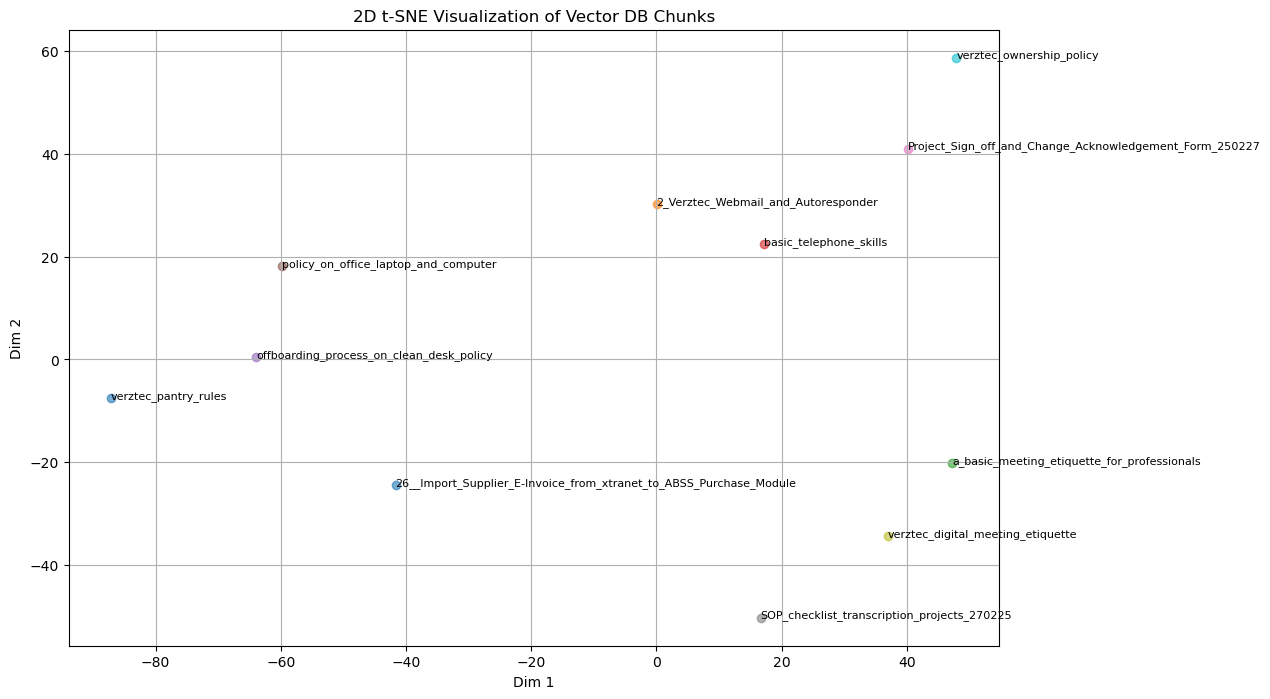

In [ ]:
  import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot each point
for i, doc in enumerate(docs):
    plt.scatter(X_2d[i, 0], X_2d[i, 1], alpha=0.6)
    # Annotate chunk ID or source filename
    plt.annotate(doc.metadata.get("source", ""), (X_2d[i, 0], X_2d[i, 1]), fontsize=8)

plt.title("2D t-SNE Visualization of Vector DB Chunks")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    'x': X_3d[:, 0],
    'y': X_3d[:, 1],
    'z': X_3d[:, 2]
})

fig = px.scatter_3d(
    df, x='x', y='y', z='z',
    color='source',
    hover_data=['chunk_id', 'text'],
    title="3D Visualization of Chunk Embeddings"
)

fig.update_traces(marker=dict(size=4))
fig.show()


ValueError: Value of 'hover_data_0' is not the name of a column in 'data_frame'. Expected one of ['x', 'y', 'z'] but received: chunk_id

# visualising vector space 

In [ ]:
# Load FAISS vector store
from langchain.vectorstores import FAISS

vector_db_smart = FAISS.load_local("faiss_index3", embedding_model,allow_dangerous_deserialization =True )

# Get stored documents (chunks)
docs = vector_db_smart.docstore._dict.values()

# Extract embeddings (hidden inside the FAISS index)
index = vector_db_smart.index
vectors = [index.reconstruct(i) for i in range(index.ntotal)]  # these are your chunk vectors


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

X = np.array(vectors)
X_3d = TSNE(n_components=3, perplexity=30, random_state=42).fit_transform(X)
X_2d = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot each point
for i, doc in enumerate(docs):
    plt.scatter(X_2d[i, 0], X_2d[i, 1], alpha=0.6)
    # Annotate chunk ID or source filename
    plt.annotate(doc.metadata.get("source", ""), (X_2d[i, 0], X_2d[i, 1]), fontsize=8)

plt.title("2D t-SNE Visualization of Vector DB Chunks")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()



In [ ]:
sources = [doc.metadata.get("source", "unknown") for doc in docs]
chunk_ids = [doc.metadata.get("chunk_id", "") for doc in docs]
texts = [doc.page_content[:100] + "..." for doc in docs]  # first 100 characters
    

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    'x': X_3d[:, 0],
    'y': X_3d[:, 1],
    'z': X_3d[:, 2],
    'source': sources,
    'chunk_id': chunk_ids,
    'text': texts,
})

fig = px.scatter_3d(
    df, x='x', y='y', z='z',
    color='source',
    hover_data=['chunk_id', 'text'],
    title="3D Visualization of Chunk Embeddings"
)

fig.update_traces(marker=dict(size=4))
fig.show()
